<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
  Import Libraries
</h1>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, auc, roc_curve
from sklearn.preprocessing import RobustScaler

<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
  Loading the Dataset
</h1>

In [3]:
df = pd.read_csv("star_classification.csv")

In [4]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
  Preprocessing the Dataset
</h1>

In [5]:
# Using the Encoder tp convert class to the numbers

le = LabelEncoder()
df["class"] = le.fit_transform(df["class"])

In [12]:
# Checking the distribution of the classes
df['class'].value_counts()

class
0    59445
2    21594
1    18961
Name: count, dtype: int64

In [8]:
# Creating the X and y variables
X = df.drop("class", axis = 1)
y = df["class"]

In [13]:
# Creating the SMOTE method to handle the imbalanced dataset
sm = SMOTE(random_state = 30, k_neighbors = 5)
X, y = sm.fit_resample(X, y)

In [14]:
# Checking the distribution of the classes after resampling
y.value_counts()

class
0    59445
1    59445
2    59445
Name: count, dtype: int64

In [16]:
# Splitting the data into train, val and test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42)

In [19]:
# Scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)
scaler = RobustScaler()

<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
  Random Forest Classifier
</h1>

In [27]:
# I am going to create a Dataframe to store the results of Random Forest for 20 neighbors.
# I will sort them and observe at which number of neighbors the highest score is achieved.
rforest_top = pd.DataFrame(columns = ['Neighbors', 'Test Accuracy'])

for i in range(1, 21):
    rforest = RandomForestClassifier(n_estimators = i, random_state = 42)
    rforest.fit(X_train, y_train)
    y_pred = rforest.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    rforest_top.loc[len(rforest_top)] = [i, accuracy]
rforest_top.sort_values(by = 'Test Accuracy', ascending = False).head().reset_index( drop= True)

,Neighbors,Test Accuracy
0,19.0,0.982916
1,16.0,0.982841
2,18.0,0.982804
3,20.0,0.982766
4,17.0,0.982692


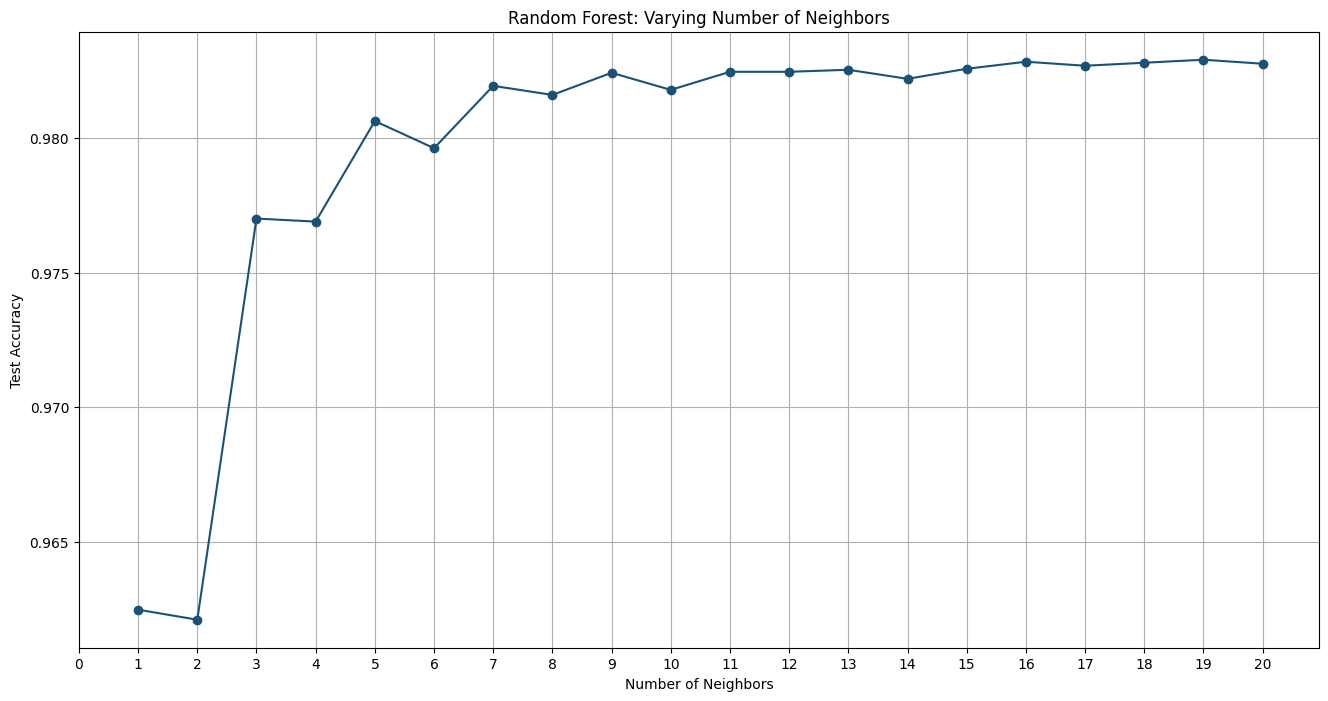

In [29]:
plt.figure(figsize = (16, 8))
plt.plot(rforest_top['Neighbors'], rforest_top['Test Accuracy'], marker = 'o', color = '#1a5174')
plt.title('Random Forest: Varying Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Test Accuracy')
plt.xticks(rotation = 0, ticks = range(0, 21, 1))
plt.grid(True)
plt.show()

# A graph serves as a good tool for comprehending the fluctuations in scores relative to the number of neighbors.

In [30]:
# Use the above graph to find the best number of neighbors
rforest = RandomForestClassifier(n_estimators = 19, random_state = 42)
rforest.fit(X_train, y_train)
y_pred = rforest.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(accuracy)

0.9829158878504672
